In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [ ]:
def generate_sequence(mean, length=30, noise=0.5):
    x = np.linspace(0, 1, length)
    return mean + np.random.normal(0, noise, size=length)

def create_dataset():
    word1 = [generate_sequence(0.0) for _ in range(20)]
    word2 = [generate_sequence(3.0) for _ in range(20)]
    return word1, word2

In [ ]:
def kalman_filter(z, Q=1e-5, R=0.1**2):
    n = len(z)
    xhat = np.zeros(n)
    P = np.zeros(n)
    xhat[0] = z[0]
    P[0] = 1.0

    for k in range(1, n):
        # Dự đoán
        xhat_minus = xhat[k-1]
        P_minus = P[k-1] + Q

        # Cập nhật
        K = P_minus / (P_minus + R)
        xhat[k] = xhat_minus + K * (z[k] - xhat_minus)
        P[k] = (1 - K) * P_minus

    return xhat

In [ ]:
def train_hmm(sequences, n_components=3):
    lengths = [len(seq) for seq in sequences]
    X = np.concatenate(sequences).reshape(-1, 1)
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100)
    model.fit(X, lengths)
    return model

In [ ]:
def predict(model1, model2, sample):
    log1 = model1.score(sample.reshape(-1, 1))
    log2 = model2.score(sample.reshape(-1, 1))
    return "word1" if log1 > log2 else "word2"

In [ ]:
word1_raw, word2_raw = create_dataset()

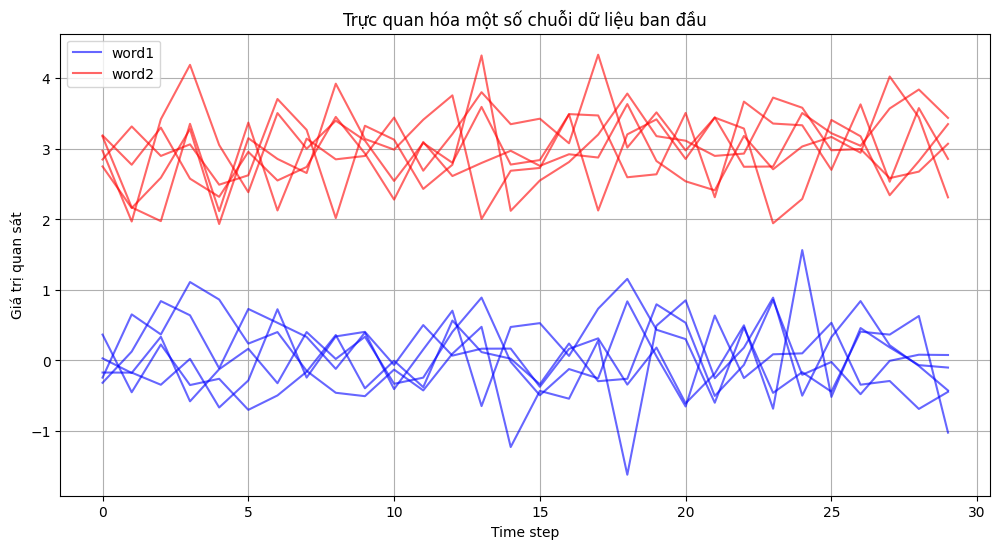

In [ ]:
# Trực quan hóa dữ liệu ban đầu
def visualize_original_data(word1, word2, n_samples=5):
    plt.figure(figsize=(12, 6))
    
    for i in range(n_samples):
        plt.plot(word1[i], color='blue', alpha=0.6, label='word1' if i == 0 else "")
        plt.plot(word2[i], color='red', alpha=0.6, label='word2' if i == 0 else "")
    
    plt.title('Trực quan hóa một số chuỗi dữ liệu ban đầu')
    plt.xlabel('Time step')
    plt.ylabel('Giá trị quan sát')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_original_data(word1_raw, word2_raw)

In [ ]:
word1_kalman = [kalman_filter(seq) for seq in word1_raw]
word2_kalman = [kalman_filter(seq) for seq in word2_raw]

In [ ]:
hmm_raw_word1 = train_hmm(word1_raw)
hmm_raw_word2 = train_hmm(word2_raw)

hmm_kalman_word1 = train_hmm(word1_kalman)
hmm_kalman_word2 = train_hmm(word2_kalman)

In [ ]:
# Test
sample = generate_sequence(0.0)  # tạo 1 từ kiểu word1

# So sánh nhận dạng
print("Dự đoán bằng HMM thường:", predict(hmm_raw_word1, hmm_raw_word2, sample))
print("Dự đoán bằng HMM + Kalman:", predict(hmm_kalman_word1, hmm_kalman_word2, kalman_filter(sample)))

Dự đoán bằng HMM thường: word1
Dự đoán bằng HMM + Kalman: word1


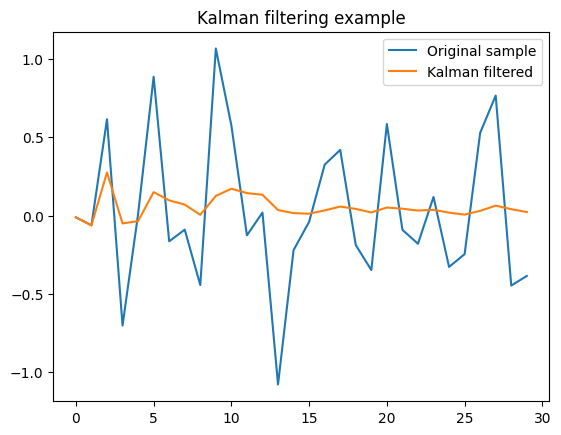

In [ ]:
# Vẽ so sánh
plt.plot(sample, label='Original sample')
plt.plot(kalman_filter(sample), label='Kalman filtered')
plt.legend()
plt.title('Kalman filtering example')
plt.show()